In [ ]:
# Forcing autoreload of modules so restart is not required
%load_ext autoreload
%autoreload 2

import os

os.chdir("..")


print("Current Working Directory:  ", os.getcwd())

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

In [3]:
X_train = pd.read_csv('./data/processed/NB15/binary_comb/X_train.csv',low_memory=False)
Y_train = pd.read_csv('./data/processed/NB15/binary_comb/Y_train.csv',low_memory=False)


X_test = pd.read_csv('./data/processed/NB15/binary_comb/X_test.csv',low_memory=False)
Y_test = pd.read_csv('./data/processed/NB15/binary_comb/Y_test.csv',low_memory=False)

In [4]:
len(X_train)

101010

In [ ]:
print(Y_train.value_counts()) 
print(Y_test.value_counts())

label
0        51010
1        50000
Name: count, dtype: int64
label
0        20520
1         5408
Name: count, dtype: int64


In [ ]:
Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [7]:
dt_model = DecisionTreeClassifier(random_state=42)

In [8]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
Y_pred_dt = dt_model.predict(X_test)

In [10]:
accuracy = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(classification_report(Y_test, Y_pred_dt))

Decision Tree Accuracy: 0.7914
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     20520
           1       0.00      0.00      0.00      5408

    accuracy                           0.79     25928
   macro avg       0.40      0.50      0.44     25928
weighted avg       0.63      0.79      0.70     25928



/home/adrian/UARK/Spring_2025/NetworkSecurity/project/code/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/UARK/Spring_2025/NetworkSecurity/project/code/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/adrian/UARK/Spring_2025/NetworkSecurity/project/code/.venv/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [11]:
print(confusion_matrix(Y_test, Y_pred_dt))

[[20520     0]
 [ 5408     0]]


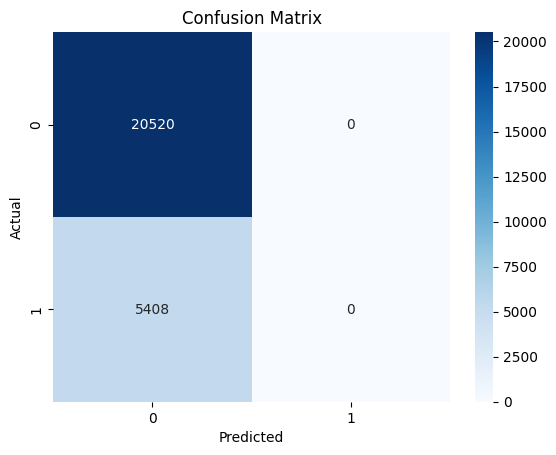

In [12]:
cm = confusion_matrix(Y_test, Y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()